# 시카고 샌드위치 맛집 분석

## 1. 시카고 샌드위치 맛집 사이트에 접근하기

In [51]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [52]:
url_base = 'https://www.chicagomag.com'
url_sub = '/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base + url_sub

html = urlopen(url)
soup = BeautifulSoup(html,'html.parser')

In [53]:
rest_list = soup.find_all(class_='sammy')
rest_list[1]

<div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>

In [54]:
len(rest_list)

50

# 2. 접근한 웹 페이지에서 원하는 데이터 추출하고 정리하기

In [55]:
tmp_one = rest_list[0]

In [56]:
tmp_one.find(class_='sammyRank')

<div class="sammyRank">1</div>

In [57]:
tmp_one.find(class_='sammyRank').get_text()

'1'

In [58]:
tmp_one.find(class_='sammyListing').get_text()

'BLT\r\nOld Oak Tap\nRead more '

In [59]:
tmp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

In [60]:
tmp_str = tmp_one.find(class_='sammyListing').get_text()
tmp_str.split('\n')

['BLT\r', 'Old Oak Tap', 'Read more ']

In [61]:
tmp_res = tmp_str.split('\n')
menu = tmp_res[0].replace('\r', '')
menu

'BLT'

In [62]:
cafe = tmp_res[1]
cafe

'Old Oak Tap'

# Regular Expressrion

In [63]:
import re

In [64]:
re.split(('\n|\r\n'),tmp_str)

['BLT', 'Old Oak Tap', 'Read more ']

In [65]:
print(re.split(('\n|\r\n'),tmp_str)[0])
print(re.split(('\n|\r\n'),tmp_str)[1])

BLT
Old Oak Tap


## 데이터 프레임 만들기 전에 항목 데이터 구하기

In [66]:
from urllib.parse import urljoin

rank = []
main_menu = []
cafe_name = []
url_add = []

for rest in rest_list :
    print(rest)
    rank.append(int(rest.find(class_='sammyRank').get_text()))
    tmp_str = rest.find(class_='sammyListing').get_text()
    main_menu.append(re.split(('\n|\r\n'),tmp_str)[0])
    cafe_name.append(re.split(('\n|\r\n'),tmp_str)[1])
    url_add.append(urljoin(url_base,rest.find('a')['href']))
    
    


<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>
<div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>
<div class="sammy" style="position: relative;">
<div class="sammyRank">3</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>
</div>
<div class="sammy" style="position: relative;">
<div class="sammyRank">4</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-De

In [67]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

In [68]:
rank[:5]

[1, 2, 3, 4, 5]

In [69]:
url_add[:5]

['https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

In [70]:
# 데이터 프레임으로 만들기

import pandas as pd

df = pd.DataFrame({'rank':rank, 'cafe': cafe_name, 'menu': main_menu, 'URL': url_add})
df.head()

,rank,cafe,menu,URL
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...


In [71]:
df.to_csv('chicago1.csv', sep=',', encoding='UTF-8')

## 3. 다수의 웹 페이지에 자동으로 접근해서 원하는 정보 가져오기

In [72]:
df['URL'][0]

'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'


<!DOCTYPE html>

<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  1. Old Oak Tap BLT |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
<meta content="“Truly inspired.”" name="description"/>
<!-- <meta name="description" content="&#8220;Truly inspired.&#8221;"> -->
<meta content="" name="keywords"/>
<meta content="37873197144" property="fb:pages">
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<link href="//ping.chartbeat.net" rel="dns-prefetch"/>
<link h
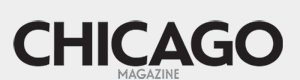

In [73]:
html = urlopen(df['URL'][0])
soup_tmp = BeautifulSoup(html, 'html.parser')
soup_tmp

In [74]:
soup_tmp.find(class_='addy')

<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>

In [75]:
tmp_str=soup_tmp.find(class_='addy').get_text()
tmp_str

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

In [76]:
tmp_str.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

In [77]:
tmp_price = tmp_str.split()[0][:-1]
tmp_price

'$10'

In [78]:
tmp_str.split()[1:-2]

['2109', 'W.', 'Chicago', 'Ave.,']

In [79]:
' '.join(tmp_str.split()[1:-2]) #위와같은 여러개의 스트링이 하나의 스트링으로 바꾼다.

'2109 W. Chicago Ave.,'

In [80]:
tmp_addr =' '.join(tmp_str.split()[1:-2])[:-1]
tmp_addr

'2109 W. Chicago Ave.'

## -상태 진행바 적용

In [81]:
from tqdm import tqdm_notebook
import time

In [82]:
price =[]
addr=[]
for n in tqdm_notebook(df.index):
    html = urlopen(df['URL'][n])
    soup_tmp = BeautifulSoup(html, 'html.parser')
    tmp_str=soup_tmp.find(class_='addy').get_text()
    
    price.append(tmp_str.split()[0][:-1])
    addr.append(' '.join(tmp_str.split()[1:-2])[:-1])

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
price[:10]

['$10', '$9', '$9.50', '$9.40', '$10', '$7.25', '$16', '$10', '$9', '$17']

In [84]:
addr[:5]

['2109 W. Chicago Ave.',
 '800 W. Randolph St.',
 '445 N. Clark St.',
 '914 Noyes St., Evanston',
 '825 W. Fulton Mkt.']

In [85]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

pop= pd.read_csv('chicago1.csv')

pop = pop.drop(['URL'],axis=1)

In [86]:
pop

,Unnamed: 0,rank,cafe,menu
0,0,1,Old Oak Tap,BLT
1,1,2,Au Cheval,Fried Bologna
2,2,3,Xoco,Woodland Mushroom
3,3,4,Al’s Deli,Roast Beef
4,4,5,Publican Quality Meats,PB&L
5,5,6,Hendrickx Belgian Bread Crafter,Belgian Chicken Curry Salad
6,6,7,Acadia,Lobster Roll
7,7,8,Birchwood Kitchen,Smoked Salmon Salad
8,8,9,Cemitas Puebla,Atomica Cemitas
9,9,10,Nana,Grilled Laughing Bird Shrimp and Fried Po’ Boy


In [87]:
df['price'] = price
df['address'] = addr

In [88]:
df

,rank,cafe,menu,URL,price,address
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...,$10,2109 W. Chicago Ave.
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...,$9,800 W. Randolph St.
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,445 N. Clark St.
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,"914 Noyes St., Evanston"
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...,$10,825 W. Fulton Mkt.
5,6,Hendrickx Belgian Bread Crafter,Belgian Chicken Curry Salad,http://www.chicagomag.com/Chicago-Magazine/Nov...,$7.25,100 E. Walto
6,7,Acadia,Lobster Roll,https://www.chicagomag.com/Chicago-Magazine/No...,$16,1639 S. Wabash Ave.
7,8,Birchwood Kitchen,Smoked Salmon Salad,https://www.chicagomag.com/Chicago-Magazine/No...,$10,2211 W. North Ave.
8,9,Cemitas Puebla,Atomica Cemitas,https://www.chicagomag.com/Chicago-Magazine/No...,$9,3619 W. North Ave.
9,10,Nana,Grilled Laughing Bird Shrimp and Fried Po’ Boy,https://www.chicagomag.com/Chicago-Magazine/No...,$17,3267 S. Halsted St.


In [89]:
df.set_index('rank', inplace=True)
df.head()

,cafe,menu,URL,price,address
rank,,,,,
1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...,$10,2109 W. Chicago Ave.
2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...,$9,800 W. Randolph St.
3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,445 N. Clark St.
4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,"914 Noyes St., Evanston"
5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...,$10,825 W. Fulton Mkt.


## 3. 맛집 위치를 지도에 표기하기

In [212]:
import numpy as np
import folium
import googlemaps


key_fd = open('googlemapskey.txt',mode='r')
gmaps_key =  key_fd.read(100)
key_fd.close()

In [213]:
gmaps = googlemaps.Client(key=gmaps_key)

In [218]:
lat = []
lng = []

for n in tqdm_notebook(df.index):
    if df['address'][n]!= 'Multipl' :
        target_name = df['address'][n]+', '+'Chicago'
        gmaps_output = gmaps.geocode(target_name)
        location_output = gmaps_output[0].get('geometry')
        lat.append(location_output['location']['lat'])
        lng.append(location_output['location']['lat'])
        
    else :
        lat.append(np.nan)
        lng.append(np.nan)
        
        
        
        
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [219]:
df['lat']= lat
df['lng']= lng
df.head()

,cafe,menu,URL,price,address,lat,lng
rank,,,,,,,
1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...,$10,2109 W. Chicago Ave.,41.895605,41.895605
2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...,$9,800 W. Randolph St.,41.884658,41.884658
3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,445 N. Clark St.,41.890523,41.890523
4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,"914 Noyes St., Evanston",42.058322,42.058322
5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...,$10,825 W. Fulton Mkt.,41.886600,41.886600


In [220]:
mapping = folium.Map(location=[df['lat'].mean(),df['lng'].mean()],zoom_start=11)

folium.Marker([df['lat'].mean(),df['lng'].mean()], popup='center').add_to(mapping)

mapping

In [227]:
mapping = folium.Map(location=[df['lat'].mean(),df['lng'].mean()], zoom_start=11)

for n in df.index :
    if df['address'][n] != 'Multipl' :
        folium.Marker([df['lat'][n], df['lng'][n]], popup=df['cafe'][n]).add_to(mapping)
        
mapping

In [231]:
mapping.save('chicago1.html')